In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Data2/final.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,상권_코드,상권_코드_명,점포매출액,...,행정동_코드_명_신사동,행정동_코드_명_신원동,행정동_코드_명_은천동,행정동_코드_명_인헌동,행정동_코드_명_조원동,행정동_코드_명_중앙동,행정동_코드_명_청룡동,행정동_코드_명_청림동,행정동_코드_명_행운동,행정동_코드_명
0,2014,2,A,골목상권,11620,관악구,11620525,1000804,당곡길,5.713964e+08,...,0,0,0,0,0,0,0,0,0,보라매동
1,2014,2,A,골목상권,11620,관악구,11620525,1000811,봉천로13길,1.337315e+08,...,0,0,0,0,0,0,0,0,0,보라매동
2,2014,2,A,골목상권,11620,관악구,11620545,1000783,관악로30길,2.019276e+08,...,0,0,0,0,0,0,0,1,0,청림동
3,2014,2,A,골목상권,11620,관악구,11620545,1000835,청림3길,1.604613e+08,...,0,0,0,0,0,0,0,1,0,청림동
4,2014,2,A,골목상권,11620,관악구,11620565,1000786,구암길,3.152107e+07,...,0,0,0,0,0,0,0,0,0,성현동


### 순서 정리 하기

In [3]:
desc1=data.iloc[:,:7]
desc2=data['행정동_코드_명']
desc3=data.iloc[:,7:9]
target_feature=data.iloc[:,9:-1]

In [4]:
data = pd.concat([desc1,desc2,desc3,target_feature],axis=1)
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,행정동_코드_명_신림동,행정동_코드_명_신사동,행정동_코드_명_신원동,행정동_코드_명_은천동,행정동_코드_명_인헌동,행정동_코드_명_조원동,행정동_코드_명_중앙동,행정동_코드_명_청룡동,행정동_코드_명_청림동,행정동_코드_명_행운동
0,2014,2,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,...,0,0,0,0,0,0,0,0,0,0
1,2014,2,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,...,0,0,0,0,0,0,0,0,0,0
2,2014,2,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,...,0,0,0,0,0,0,0,0,1,0
3,2014,2,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,...,0,0,0,0,0,0,0,0,1,0
4,2014,2,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '개업_점포_수',
       '프랜차이즈_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1',
       '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_

In [6]:
data.to_csv('./data2/final2.csv',index=False)

### 정규화 필요한 컬럼 따로 빼기

In [7]:
normalize_feature = data.iloc[:,11:56]
col_name = "정규화-" + data.columns[11:56] 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled =scaler.fit_transform(normalize_feature)
feature_scaled_df=pd.DataFrame(feature_scaled,columns=col_name)

In [9]:
data=pd.concat([data,feature_scaled_df],axis=1)

### 정규화 전후 비교하기

In [10]:
data.columns[11:80]

Index(['점포수', '개업_점포_수', '프랜차이즈_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1',
       '개업_점포_수1', '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
  

In [11]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1',
       '개업_점포_수1', '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [12]:
from module.default import basic
from module.error import model_err_measure
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.891131217059342
test :  0.8236004075670168
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8188681898134934
test :  0.7918264934839211
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.8136087673577052
test :  0.7937900436473914
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8130405658438541
test :  0.7934887275324517
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9895992241583368
test :  0.9306761003373571
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.718602e+16,1.351990e+08,1.928368e+08,0.740568
0,rd,3.774049e+16,1.364881e+08,1.942691e+08,0.734925
0,ls,3.767760e+16,1.366258e+08,1.941072e+08,0.737867


In [13]:
feature=data[['행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동', '정규화-점포수', '정규화-개업_점포_수', '정규화-프랜차이즈_점포_수',
       '정규화-총_직장_인구_수', '정규화-연령대_10_직장_인구_수', '정규화-점포수1', '정규화-개업_점포_수1',
       '정규화-프랜차이즈_점포_수1', '정규화-총_직장_인구_수1', '정규화-연령대_10_직장_인구_수1',
       '정규화-점포수^21', '정규화-점포수 개업_점포_수1', '정규화-점포수 프랜차이즈_점포_수1',
       '정규화-점포수 총_직장_인구_수1', '정규화-점포수 연령대_10_직장_인구_수1', '정규화-개업_점포_수^21',
       '정규화-개업_점포_수 프랜차이즈_점포_수1', '정규화-개업_점포_수 총_직장_인구_수1',
       '정규화-개업_점포_수 연령대_10_직장_인구_수1', '정규화-프랜차이즈_점포_수^21',
       '정규화-프랜차이즈_점포_수 총_직장_인구_수1', '정규화-프랜차이즈_점포_수 연령대_10_직장_인구_수1',
       '정규화-총_직장_인구_수^21', '정규화-총_직장_인구_수 연령대_10_직장_인구_수1',
       '정규화-연령대_10_직장_인구_수^21', '정규화-점포수2', '정규화-개업_점포_수2', '정규화-프랜차이즈_점포_수2',
       '정규화-총_직장_인구_수2', '정규화-연령대_10_직장_인구_수2', '정규화-점포수^22',
       '정규화-점포수 개업_점포_수2', '정규화-점포수 프랜차이즈_점포_수2', '정규화-점포수 총_직장_인구_수2',
       '정규화-점포수 연령대_10_직장_인구_수2', '정규화-개업_점포_수^22', '정규화-개업_점포_수 프랜차이즈_점포_수2',
       '정규화-개업_점포_수 총_직장_인구_수2', '정규화-개업_점포_수 연령대_10_직장_인구_수2',
       '정규화-프랜차이즈_점포_수^22', '정규화-프랜차이즈_점포_수 총_직장_인구_수2',
       '정규화-프랜차이즈_점포_수 연령대_10_직장_인구_수2', '정규화-총_직장_인구_수^22',
       '정규화-총_직장_인구_수 연령대_10_직장_인구_수2', '정규화-연령대_10_직장_인구_수^22']]
target = data['점포매출액']

In [14]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8441797054804688
test :  0.767851807271944
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8142355959359149
test :  0.792197301156358
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.8069219841496688
test :  0.7891838307331323
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8072553617419107
test :  0.7880137509333384
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9892971989284879
test :  0.9330649852472697
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.654891e+16,1.408177e+08,1.911777e+08,0.717476
0,rd,3.846157e+16,1.450342e+08,1.961162e+08,0.698896
0,ls,3.895159e+16,1.455510e+08,1.973616e+08,0.699323


### 정규화 안한거 쓰는게 예측률이 더 좋음

In [15]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1',
       '개업_점포_수1', '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

### 그리드 서치 이용해서 최적의 하이퍼 파라미터 값 확인하기

In [16]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.model_selection import train_test_split , GridSearchCV

In [17]:
params ={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

train_input, test_input, train_target , test_target  = \
    train_test_split(feature,target,test_size=0.2)

In [18]:
gs = GridSearchCV(
    Ridge(),
    params,
    return_train_score=True
)

gs.fit(train_input,train_target)

modelName = gs.best_estimator_
modelName.score(test_input,test_target)
gs.best_params_

{'alpha': 0.01}

In [19]:
test = gs.cv_results_['mean_test_score']
train = gs.cv_results_['mean_train_score']

In [20]:
df=pd.concat([pd.Series(test),pd.Series(train)],axis=1)
df.columns = ['test','train']

In [21]:
df.index = np.log10(params['alpha'])

In [22]:
df

,test,train
-4.0,0.777528,0.810281
-3.0,0.777974,0.810210
-2.0,0.779002,0.809437
-1.0,0.777474,0.806757
0.0,0.775439,0.803970
1.0,0.771196,0.796694
2.0,0.715257,0.733827
3.0,0.646990,0.658452
4.0,0.624809,0.633055


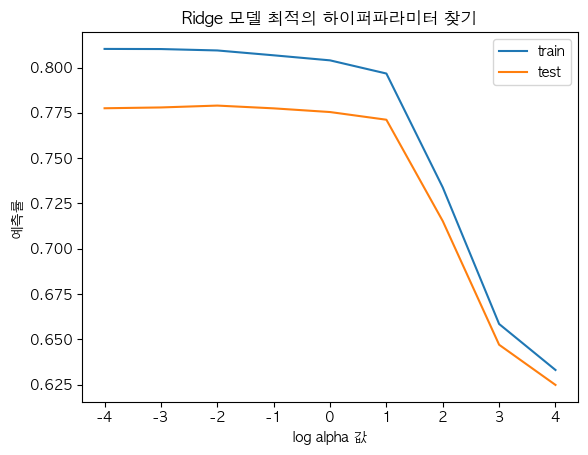

In [23]:
df['train'].plot(
    legend='train'
)
df['test'].plot(
    legend='test'
)

plt.title('Ridge 모델 최적의 하이퍼파라미터 찾기')

plt.legend()
plt.xlabel('log alpha 값')
plt.ylabel('예측률')

plt.show()

In [24]:
params ={'alpha':[0.1,1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9,10**10]}

In [25]:
gs = GridSearchCV(
    Lasso(),
    params,
    return_train_score=True
)

gs.fit(train_input,train_target)

modelName = gs.best_estimator_
modelName.score(test_input,test_target)
gs.best_params_

{'alpha': 100000}

In [26]:
test = gs.cv_results_['mean_test_score']
train = gs.cv_results_['mean_train_score']
df=pd.concat([pd.Series(test),pd.Series(train)],axis=1)
df.columns = ['test','train']
df.index = np.log10(params['alpha'])

In [27]:
df

,test,train
-1.0,0.774750,0.803554
0.0,0.774750,0.803554
1.0,0.774750,0.803554
2.0,0.774750,0.803554
3.0,0.774751,0.803551
4.0,0.774761,0.803519
5.0,0.774859,0.802970
6.0,0.772235,0.795104
7.0,0.706546,0.721201
8.0,0.609402,0.614732


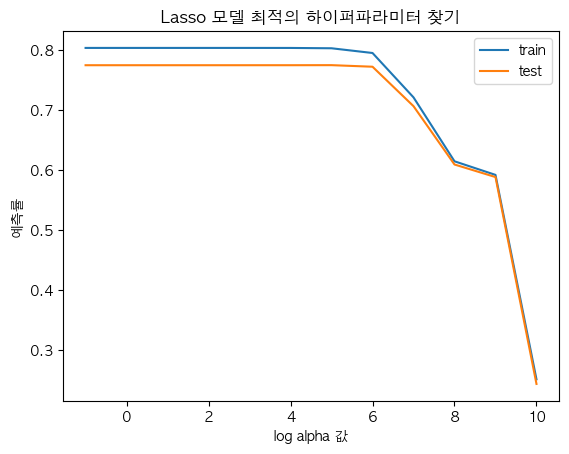

In [28]:
df['train'].plot(
    legend='train'
)
df['test'].plot(
    legend='test'
)

plt.title('Lasso 모델 최적의 하이퍼파라미터 찾기')

plt.legend()
plt.xlabel('log alpha 값')
plt.ylabel('예측률')

plt.show()

### Ridge 로 사용할 경우 alpah = 10
### Lasso 로 사용할 경우 alpha = 10**6

### 머신러닝 모델 만들어서 저장하기

### 모델 만들기

In [29]:
feature_com=feature.to_numpy()
target_com=target.to_numpy()

In [30]:
ridge=Ridge(alpha=10)
lasso=Lasso(alpha=10**6)

In [31]:
ridge.fit(feature_com,target_com)
lasso.fit(feature_com,target_com)

Lasso(alpha=1000000)

### 저장하기

In [32]:
import joblib

In [33]:
filename = './Data2/gwanak_ridge_model.h5'
joblib.dump(ridge,filename=filename)

['./Data2/gwanak_ridge_model.h5']

In [34]:
filename = './Data2/gwanak_lasso_model.h5'
joblib.dump(lasso,filename=filename)

['./Data2/gwanak_lasso_model.h5']

In [35]:
model = joblib.load('./Data2/gwanak_lasso_model.h5')

In [36]:
test=data.iloc[3,56:].to_numpy()
answer=data.iloc[3,10:11].to_numpy()

In [37]:
predict=model.predict([test])

In [38]:
answer - predict

array([1034261967.9693904], dtype=object)

### .tflite 만들기

#### Keras 모델 만들기

In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(5, input_dim=66, activation='relu'))

In [46]:
model.add(Dense(3))

In [47]:
model.add(Dense(1))

In [48]:
model.compile(loss='mse', optimizer='adam')

In [49]:
model.fit(feature, target, epochs=100, batch_size=1)

Epoch 1/100


2023-02-21 00:58:45.735858: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-21 00:58:45.926875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1852/1852 [==============================] - 8s 4ms/step - loss: 346108462079410176.0000
Epoch 2/100
1852/1852 [==============================] - 7s 4ms/step - loss: 345906151939899392.0000
Epoch 3/100
1852/1852 [==============================] - 7s 4ms/step - loss: 345363405512638464.0000
Epoch 4/100
1852/1852 [==============================] - 7s 4ms/step - loss: 344430195018563584.0000
Epoch 5/100
1852/1852 [==============================] - 8s 4ms/step - loss: 343060547127738368.0000
Epoch 6/100
1852/1852 [==============================] - 7s 4ms/step - loss: 341161072071278592.0000
Epoch 7/100
1852/1852 [==============================] - 7s 4ms/step - loss: 338709745256890368.0000
Epoch 8/100
1852/1852 [==============================] - 6s 3ms/step - loss: 335606923443306496.0000
Epoch 9/100
1852/1852 [==============================] - 6s 3ms/step - loss: 331950669323829248.0000
Epoch 10/100
1852/1852 [==============================] - 6s 3ms/step - loss: 327585298923913216.0000
E

In [50]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/vf/8xq5853s7zdffbbxdf_fk_xc0000gn/T/tmp69h83zo7/assets


2023-02-21 01:10:21.496808: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-21 01:10:21.496965: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-21 01:10:21.499731: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/vf/8xq5853s7zdffbbxdf_fk_xc0000gn/T/tmp69h83zo7
2023-02-21 01:10:21.502552: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2023-02-21 01:10:21.502559: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/vf/8xq5853s7zdffbbxdf_fk_xc0000gn/T/tmp69h83zo7
2023-02-21 01:10:21.506378: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-02-21 01:10:21.509035: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-02-21 01:10:21.564430: I tensorflow/cc/saved_model/loader.

In [57]:
model.predict(feature.iloc[0:1,:])

1/1 [==============================] - 0s 73ms/step


2023-02-21 01:11:31.113566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[5.376924e+08]], dtype=float32)

In [59]:
target

0       5.713964e+08
1       1.337315e+08
2       2.019276e+08
3       1.604613e+08
4       3.152107e+07
            ...     
1847    5.277256e+07
1848    1.057875e+08
1849    1.531167e+08
1850    2.410726e+07
1851    2.761950e+08
Name: 점포매출액, Length: 1852, dtype: float64

In [ ]:
5.376924e+08